Reference:  https://stackoverflow.com/questions/48122019/how-can-i-plot-identity-lines-on-a-seaborn-pairplot  

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [19]:
pd.set_option('display.max_columns', None)
# file = './Smoothing/smoothing_samples01_02_rmse.csv'
# file = './Smoothing/020301_0819.csv'
file = './Smoothing/smooth_020301.csv'
# file = './Smoothing/smoothing_020301_all_02ALT.csv'
data = pd.read_csv(file)
data

,OID_,Field1,Unnamed__0,OBJECTID__,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,HWM_ELEV_ft,HWM_ELEV_m,DEM_m,HAND_m,Inun_Depth_m,Stream_H_m,COMID,StreamOrde,fmax,time_file,Predict_Stream_H_m,roughness,RMSE,smooth_3,smooth_2,smooth_4,smooth_5,smooth_6,smooth_a,maxflow0818
0,1,83,83,105,18,4.0,HACK1,HACK1_4,40.879139,-74.040361,4.4885,1.368095,2.446147,2.602739,-1.078052,1.524687,6251150,4,532.939988,20110828_23,1.548309,0.006423,0.023622,0.001132,0.001125,0.001095,0.001409,0.001221,0.001753,0.000000
1,2,84,84,106,18,5.0,HACK1,HACK1_5,40.880139,-74.039917,4.6435,1.415339,1.935929,2.092521,-0.520590,1.571931,6251150,4,532.939988,20110828_23,1.548309,0.006423,0.023622,0.001218,0.001125,0.001095,0.270788,0.429736,0.001753,0.000000
2,3,85,85,107,19,2.0,HACK2,HACK2_2,40.934750,-74.028972,13.1460,4.006901,2.673049,2.778838,1.333852,4.112690,6249684,4,582.699987,20110828_19,4.213303,0.005000,0.113803,1.434159,1.438677,1.434303,1.486491,1.497861,1.434201,1.434465
3,4,86,86,108,19,4.0,HACK2,HACK2_4,40.934778,-74.028528,13.3660,4.073957,2.085083,2.190872,1.988874,4.179746,6249684,4,582.699987,20110828_19,4.213303,0.005000,0.113803,2.022912,2.029566,2.022513,2.095026,2.174194,2.022970,2.022431
4,5,87,87,109,19,5.0,HACK2,HACK2_5,40.935000,-74.028139,12.9310,3.941369,2.116071,2.221860,1.825298,4.047158,6249684,4,582.699987,20110828_19,4.213303,0.005000,0.113803,1.449724,1.450990,1.448178,1.497149,1.511485,1.448075,1.448187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,729,951,951,27,60,NaN,Somerset,NaN,40.549746,-74.586101,47.6254,14.516222,13.925290,6.369551,0.590932,6.960483,9513382,5,1593.829964,20110828_18,6.338650,0.006644,0.629992,0.026031,0.001976,0.058584,0.001307,0.020789,0.002570,0.000000
729,730,952,952,56,107,NaN,Somerset,NaN,40.560537,-74.527339,36.3069,11.066343,8.906622,5.057386,2.159721,7.217107,9514000,6,2586.619942,20110828_20,6.886389,0.005000,1.443823,1.758932,1.778503,1.815625,1.860088,1.828880,1.830299,1.829003
730,731,953,953,63,115,NaN,Somerset,NaN,40.568142,-74.553190,52.6148,16.036991,17.000590,9.578168,-0.963599,8.614569,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124,0.003321,0.001256,0.005630,0.001284,0.001054,0.001386,0.000000
731,732,954,954,62,114,NaN,Somerset,NaN,40.568788,-74.553292,53.0096,16.157326,16.397320,9.169795,-0.239994,8.929801,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124,0.003321,0.001256,0.005630,0.001284,0.001054,0.001386,0.000000


In [22]:
data['Predict_Inun_Depth_m'] = ''
data['Predict_Inun_Depth_m'] = data['Predict_Stream_H_m'] - data['HAND_m']
data

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OID_,Field1,Unnamed__0,OBJECTID__,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,HWM_ELEV_ft,HWM_ELEV_m,DEM_m,HAND_m,Inun_Depth_m,Stream_H_m,COMID,StreamOrde,fmax,time_file,Predict_Stream_H_m,roughness,RMSE,smooth_3,smooth_2,smooth_4,smooth_5,smooth_6,smooth_a,maxflow0818,Predict_Inun_Depth_m
0,1,83,83,105,18,4.0,HACK1,HACK1_4,40.879139,-74.040361,4.4885,1.368095,2.446147,2.602739,-1.078052,1.524687,6251150,4,532.939988,20110828_23,1.548309,0.006423,0.023622,0.001132,0.001125,0.001095,0.001409,0.001221,0.001753,0.000000,-1.054430
1,2,84,84,106,18,5.0,HACK1,HACK1_5,40.880139,-74.039917,4.6435,1.415339,1.935929,2.092521,-0.520590,1.571931,6251150,4,532.939988,20110828_23,1.548309,0.006423,0.023622,0.001218,0.001125,0.001095,0.270788,0.429736,0.001753,0.000000,-0.544212
2,3,85,85,107,19,2.0,HACK2,HACK2_2,40.934750,-74.028972,13.1460,4.006901,2.673049,2.778838,1.333852,4.112690,6249684,4,582.699987,20110828_19,4.213303,0.005000,0.113803,1.434159,1.438677,1.434303,1.486491,1.497861,1.434201,1.434465,1.434465
3,4,86,86,108,19,4.0,HACK2,HACK2_4,40.934778,-74.028528,13.3660,4.073957,2.085083,2.190872,1.988874,4.179746,6249684,4,582.699987,20110828_19,4.213303,0.005000,0.113803,2.022912,2.029566,2.022513,2.095026,2.174194,2.022970,2.022431,2.022431
4,5,87,87,109,19,5.0,HACK2,HACK2_5,40.935000,-74.028139,12.9310,3.941369,2.116071,2.221860,1.825298,4.047158,6249684,4,582.699987,20110828_19,4.213303,0.005000,0.113803,1.449724,1.450990,1.448178,1.497149,1.511485,1.448075,1.448187,1.991443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646,868,868,944,156,2.0,WHIP9,WHIP9_2,40.790778,-74.550639,360.8840,109.997443,109.113800,1.111656,0.883643,1.995299,6250138,2,47.009999,20110828_12,1.498736,0.084927,0.452097,0.384804,0.387509,0.410783,0.752025,0.551101,0.389185,0.387080,0.387080
646,647,869,869,946,156,4.0,WHIP9,WHIP9_4,40.790944,-74.550694,359.9640,109.717027,110.035000,1.824650,-0.317973,1.506677,6250138,2,47.009999,20110828_12,1.498736,0.084927,0.452097,0.007863,0.001643,0.001580,0.155821,0.746294,0.003427,0.000000,-0.325914
647,648,870,870,947,156,5.0,WHIP9,WHIP9_5,40.790750,-74.550583,360.9540,110.018779,109.113800,1.111656,0.904979,2.016635,6250138,2,47.009999,20110828_12,1.498736,0.084927,0.452097,0.384804,0.387509,0.410783,0.752025,0.551101,0.389185,0.387080,0.387080
648,649,871,871,949,156,7.0,WHIP9,WHIP9_7,40.791028,-74.551000,360.1940,109.787131,110.934800,2.078438,-1.147669,0.930769,6250138,2,47.009999,20110828_12,1.498736,0.084927,0.452097,0.001245,0.001643,0.001095,0.317120,0.437449,0.003427,0.000000,-0.579702


In [25]:
#create rmse data and save to a file if you haven't already - use 
if True:
    for column in data.columns:
        check_str = column
        if column.find('smooth') == 0:
            name = column + '_rmse'
            data[name] = ''

    for column in data.columns:
        check_str = column
        if (column.find('smooth') == 0) and column.find('rmse') == -1:
            name = column + '_rmse'
            for catch in data.COMID.unique():
                subset = data.loc[data['COMID'] == catch]
                rmse = ((subset['Inun_Depth_m'] - subset[column]) ** 2).mean() ** .5
                data[name].loc[data['COMID'] == catch] = rmse
    data.to_csv(file[:-4] + '_rmse.csv')

C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\David\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [4]:
# data

In [5]:
# data.columns

In [23]:
# data = data.dropna()
# data

In [24]:
r2 = r2_score(data['Inun_Depth_m'], data['Inun_Depth_m'])
mse = mean_squared_error(data['Inun_Depth_m'], data['Inun_Depth_m'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = 1.0   MSE = 0.0


In [28]:
r2 = r2_score(data['Inun_Depth_m'], data['Predict_Inun_Depth_m'])
mse = mean_squared_error(data['Inun_Depth_m'], data['Predict_Inun_Depth_m'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = 0.5978   MSE = 0.84658


In [29]:
r2 = r2_score(data['Inun_Depth_m'], data['maxflow0818'])
mse = mean_squared_error(data['Inun_Depth_m'], data['maxflow0818'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = 0.32026   MSE = 1.43075


In [32]:
for name in ['Predict_Inun_Depth_m', 'maxflow0818','smooth_2', 'smooth_3', 'smooth_4', 'smooth_5', 'smooth_6', 'smooth_a']:
    score = r2_score( data['Inun_Depth_m'], data[name])
    mse = mean_squared_error( data['Inun_Depth_m'], data[name])
    print(f'{name} R² = {round(score,5)}   MSE = {round(mse,5)}')

Predict_Inun_Depth_m R² = 0.5978   MSE = 0.84658
maxflow0818 R² = 0.32026   MSE = 1.43075
smooth_2 R² = 0.33525   MSE = 1.3992
smooth_3 R² = 0.33459   MSE = 1.4006
smooth_4 R² = 0.33329   MSE = 1.40333
smooth_5 R² = 0.33007   MSE = 1.4101
smooth_6 R² = 0.31831   MSE = 1.43487
smooth_a R² = 0.33605   MSE = 1.39751


In [24]:
def plot_unity(xdata, ydata, **kwargs):
#     mn = ydata.min()
    mn = min(xdata.min(), ydata.min())  
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

In [25]:
data.index.size

997

In [27]:
subset1.index.size

843

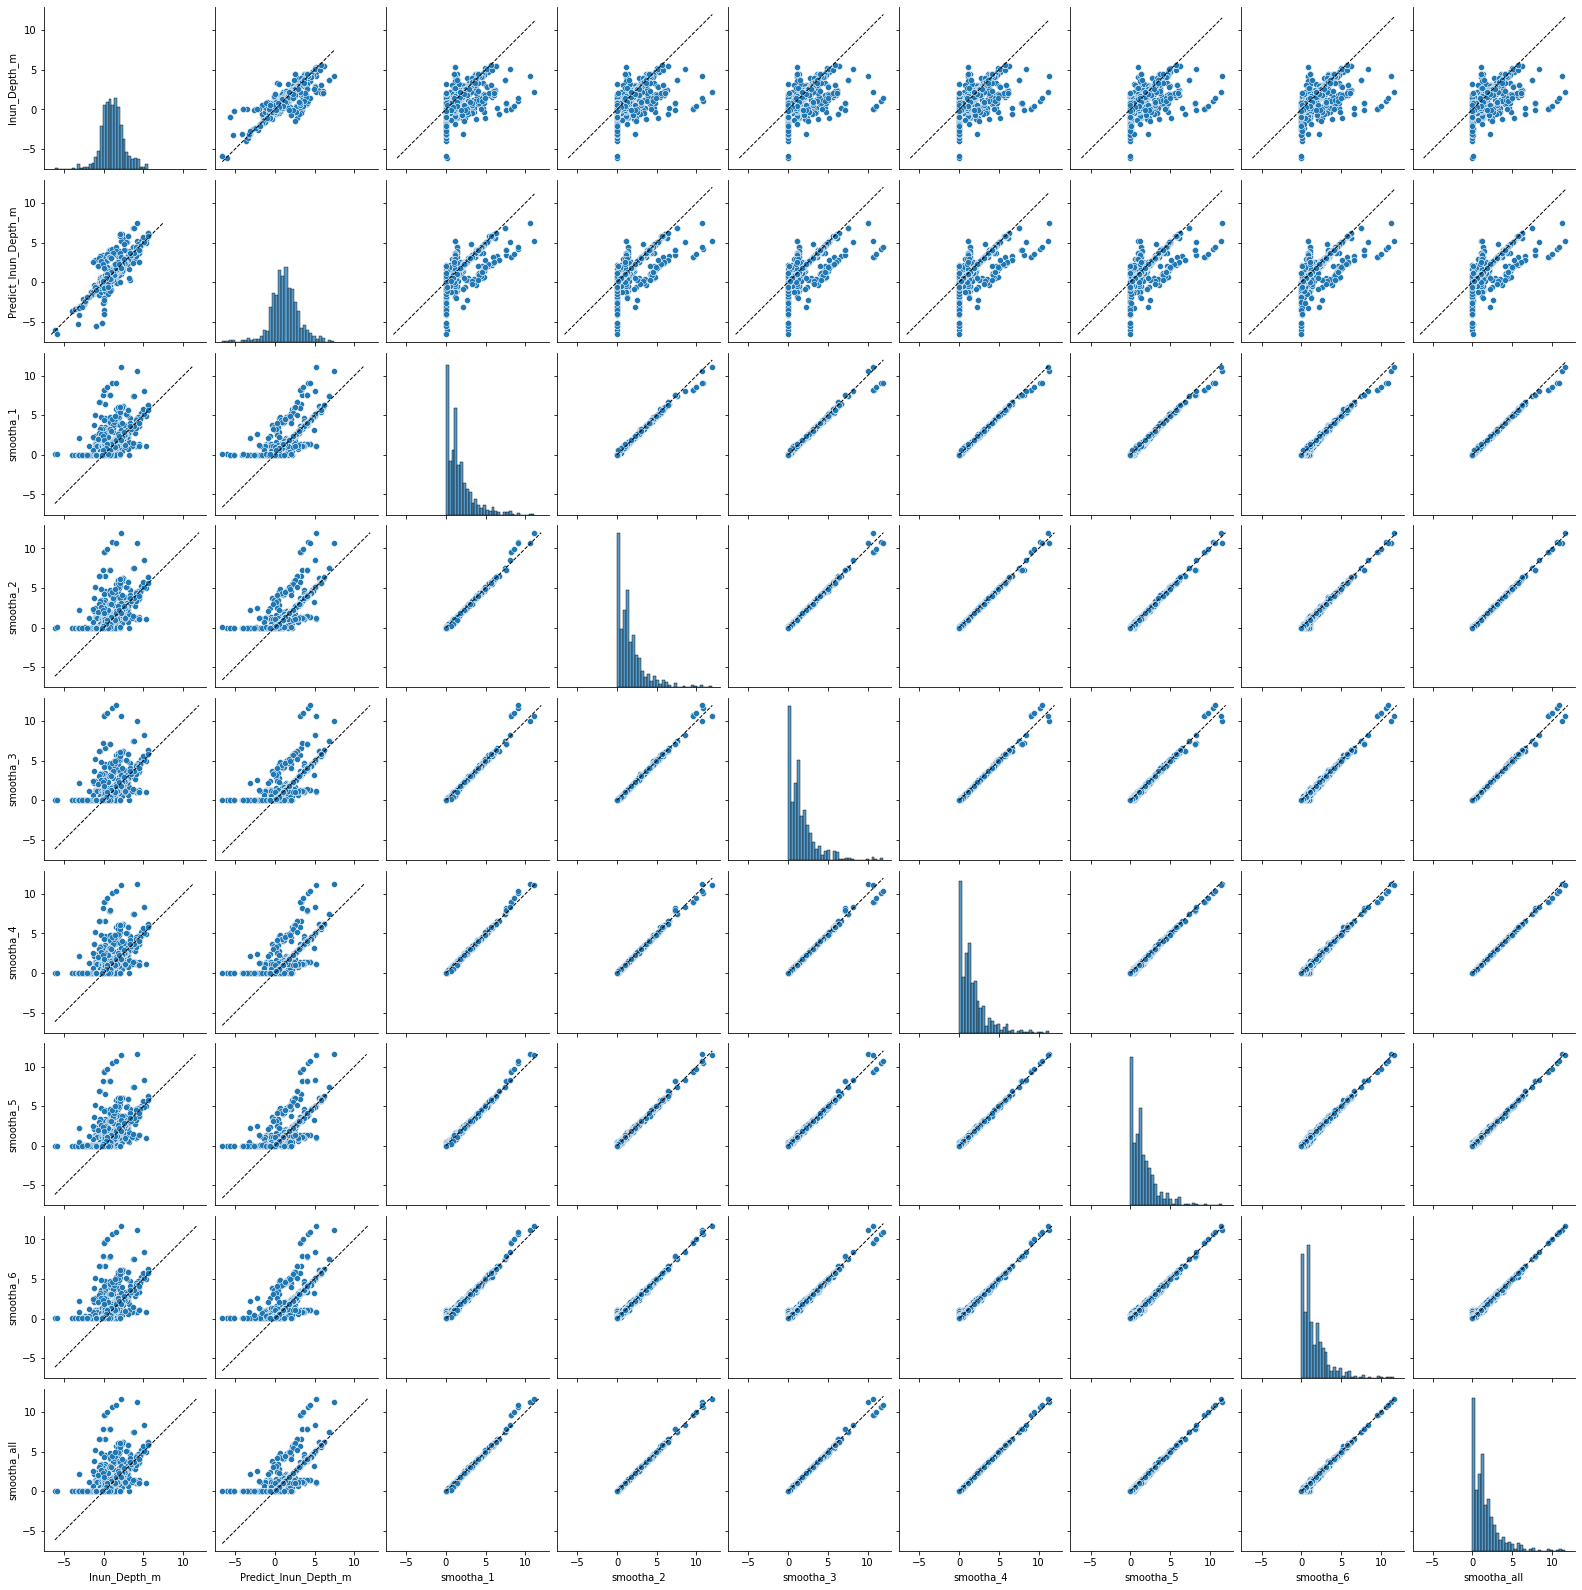

In [26]:
# sns.pairplot(subset1)
grid = sns.pairplot(subset1)
grid.map_offdiag(plot_unity)

In [25]:
# grid = sns.pairplot(subset2)
# grid.map_offdiag(plot_unity)